In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [5]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon3 = [(1,1),(10,3),(8,5),(10,6),(8,8),(10,9),(2,12),(4,10),(2,8),(4,7),(0,4),(3,2)]
polygon4 = [(0,0),(4,4),(6,1),(7,3),(8,1),(9,3),(11,1),(13,3),(7,9),(5,7),(3,10),(0,6)]
polygon5 = [(0,0),(12,1),(8,3),(12,4),(9,5),(12,6),(9,8),(12,9),(0,10),(8.8,6),(1,2)]
polygon6 = [(1,0),(3,2),(5,0),(6,2),(7,1),(9,9),(13,1),(15,3),(13,8),(10,10),(3,10),(6,6),(7,8),(7,4),(2,3),(1,7),(0,2)]
polygon7 = [(1,0),(3,3),(5,1),(7,3),(9,1),(11,2),(13,0),(15,2),(10,5),(14,6),(17,5),(16,3),(18,2),(18,7),(15,10),(7,10),(9,9),(6,7),(4,8),(6,10),(3,10),(0,8),(4,4.3),(6,4),(6,3.1),(1,5),(0,2)]
polygon8 = [(0.04277192608002693, 0.0008762265186683937),
(-0.0033571061780375833, 0.031544118675531155),
(-0.04238936424255372, 0.043339461812786056),
(-0.01777242875868275, 0.015367648087295849),
(-0.03551436424255372, 0.010312501028472323),
(-0.018437751339327915, -0.005863969559762983),
(-0.0341837190812634, -0.012604165638194359),
(-0.016885331984489202, -0.025747547991135537),
(-0.04150226746836017, -0.033498773481331616),
(-0.015554686823198882, -0.04023896955976299),
(-0.036401461016747266, -0.04799019504995907),
(-0.013115170694166622, -0.0530453421087826)]
polygon9 = [(1,0),(10,1),(3,2),(9,3),(3.5,4),(8,5),(4,6),(7,7),(4.5,8),(6,9),(0,10)]
polygon10 = [(4,4),(6,0),(8,4),(12,6),(8,8),(6,12),(4,8),(0,6)]
polygon11 = [(0,0),(20,2),(8,6),(20,7),(12,11),(19,12),(0,13),(10,12),(0,10),(12,9),(0,8),(9,7),(0,6),(13,4),(1,2)]
polygon12 = [(0,0),(10,2),(13,0),(15,2),(12,6),(14,8),(11,10),(7,11),(8,9),(10,8),(11,7),(9,5),(6,6),(5,7),(5.5,8),(6,10),(3,11),(1,11),(1,8),(3,6),(4,4),(2,3),(1,4),(0,3)]
polygon13 = [(0,1),(10,0),(18,1),(20,3),(20,10),(17,13),(14,15),(8,15),(6,14),(5,13),(6,11),(7,8),(5,5),(11,4),(14,7),(15,7.1),(12,8),(12,7),(9,8),(8,12),(13,13),(16,10),(15,8),(16,4),(3,3)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [6]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [7]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [8]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

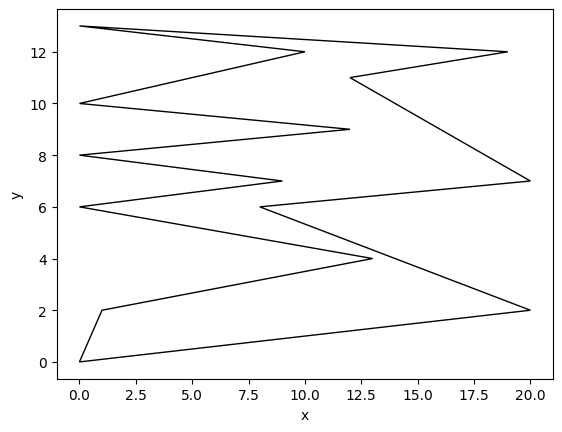

In [9]:

draw_polygon(polygon11)

Do tego celu wygeneruj wielokąt.

In [ ]:
polygon = # your polygon

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [10]:
def mat_det_3x3(a, b, c):
    return (a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[1]*b[0]-a[0]*c[1])

In [11]:
def classify(a, b, c, starting, closing, connective, separative, correct, epsilon=10 ** (-12)):
    # starting or separative or correct
    if a[1] < b[1] and c[1] < b[1]:
        # starting
        if mat_det_3x3(a, b, c) > epsilon:
            starting.append(b)
        # separative
        elif mat_det_3x3(a, b, c) < -epsilon:
            separative.append(b)

    # closing or connective or correct
    elif a[1] > b[1] and c[1] > b[1]:
        # closing
        if mat_det_3x3(a, b, c) > epsilon:
            closing.append(b)
        # connective
        elif mat_det_3x3(a, b, c) < -epsilon:
            connective.append(b)

    # correct
    else:
        correct.append(b)

In [12]:
def convert_to_lines(points):
    lines = []
    for p in range(len(points)-1):
        lines.append((points[p], points[p+1]))
    lines.append((points[-1], points[0]))
    return lines

In [13]:
def connective_or_separative(a, b, c, epsilon = 10 ** (-12)):
    determinant = mat_det_3x3(a, b, c)
    if a[1] > b[1] and c[1] > b[1] and determinant < -epsilon:
        return True
    elif a[1] < b[1] and c[1] < b[1] and determinant < -epsilon:
        return True
    return False

In [14]:
def is_y_monotonic(points):
    for i in range(0, len(points)-1):
        if connective_or_separative(points[i-1], points[i], points[i+1]):
            return False
    
    if connective_or_separative(points[-2], points[-1], points[0]):
        return False
    return True

Przeprowadź test poprawności powyższej funkcji.

In [67]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

In [66]:
print(is_y_monotonic(polygon_example_1))

False


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

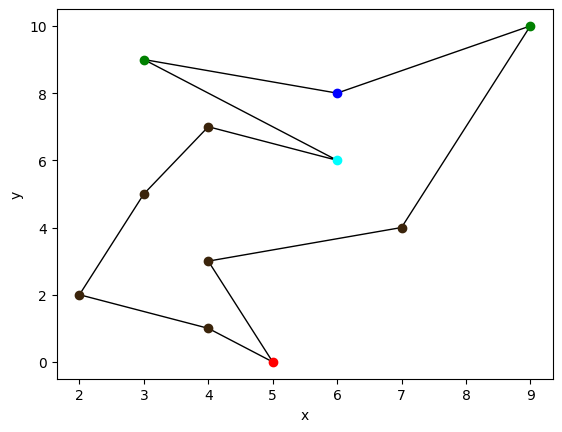

In [64]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [ ]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    

    raise Exception("Unimplemented")

In [15]:
def classify_points(points):
    starting = []
    closing = []
    connective = []
    separative = []
    correct = []
    # all points excep first and last
    for i in range(0, len(points)-1):
        classify(points[i-1], points[i], points[i+1], starting, closing, connective, separative, correct)
    
    # last point
    classify(points[-2], points[-1], points[0], starting, closing, connective, separative, correct)
    
    return starting, closing, connective, separative, correct

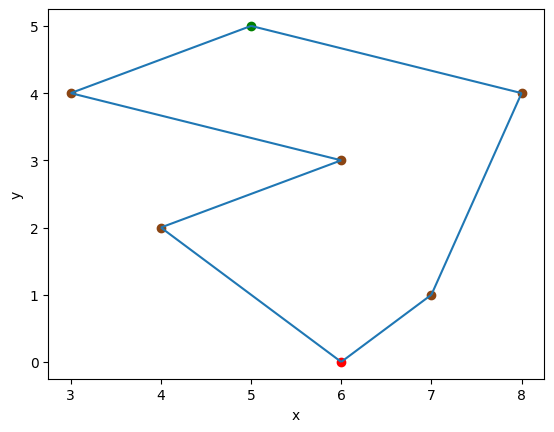

In [16]:
def draw_classification(points, starting, closing, connective, separative, correct):
    vis=Visualizer()
    vis.clear()
    vis.add_point(starting, color = "green")
    vis.add_point(closing, color = "red")
    vis.add_point(connective, color = "darkblue")
    vis.add_point(separative, color = "lightblue")
    vis.add_point(correct, color = "saddlebrown")
    
    vis.add_line_segment(convert_to_lines(points))
    vis.show()

starting, closing, connective, separative, correct = classify_points(polygon_example_1)
draw_classification(polygon_example_1, starting, closing, connective, separative, correct)

Przeprowadź test poprawności powyższej funkcji. 

In [26]:
Test().runtest(2, color_vertex)

Time: 0.000s


NameError: name 'color_vertex' is not defined

Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

In [17]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

NameError: name 'color_vertex' is not defined

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

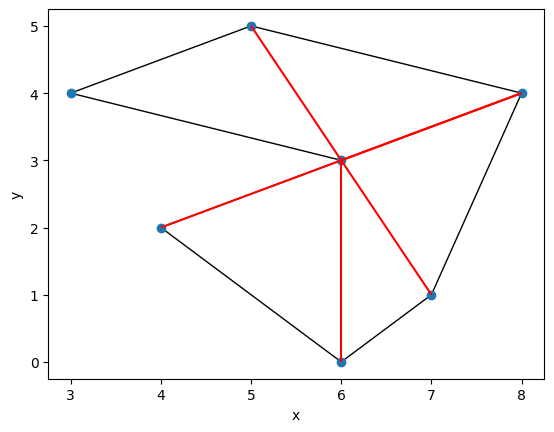

In [67]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [18]:
def find_chains(points):
    right_chain = set()
    left_chain = set()
    starting = points.index(max(points, key=lambda x: x[1]))
    ending = points.index(min(points, key=lambda x: x[1]))
    i = ending
    while i != starting:
        right_chain.add(points[i])
        i = (i + 1) % len(points)
    while i != ending:
        left_chain.add(points[i])
        i = (i + 1) % len(points)
    return left_chain, right_chain


def check_same_chains(left_chain, right_chain, point1, point2):
    if (point1 in left_chain and point2 in left_chain) or (point1 in right_chain and point2 in right_chain):
        return True
    return False

def triangle_in_polygon(chain, a, b, c, epsilon=10 ** (-12)):
    if b in chain:
        return mat_det_3x3(a, b, c) > epsilon
    else:
        return mat_det_3x3(a, b, c) < -epsilon


def check_neighbours(points, a, b):
    a_index = points.index(a)
    b_index = points.index(b)
    if abs(a_index - b_index) == 1:
        return True
    elif abs(a_index - b_index) == len(points) - 1:
        return True
    return False

Polygon is y-monotonic.


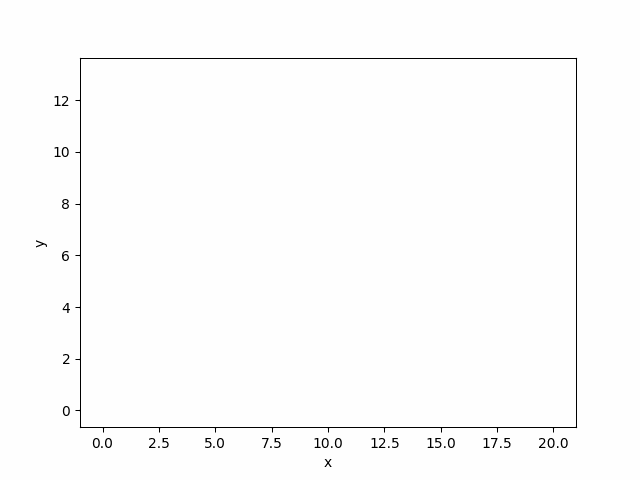

In [19]:
def triangulation(points):
    if not is_y_monotonic(points):
        print("Polygon is not y-monotonic.")
        return None, None
    print("Polygon is y-monotonic.")
    lines = convert_to_lines(points)
    vis.add_point(points, color='green')
    vis.add_line_segment(lines, color='black')
 

    points_copy = points[:]
    left_chain, right_chain = find_chains(points)
    points.sort(key=lambda x: x[1], reverse=True)

    stack = [points[0], points[1]]
    diagonals = []
    for i in range(2, len(points)):
        curr_diagonals = diagonals[:]
        curr_stack = stack[:]
        vis.add_point(points, color="green")
        vis.add_point(curr_stack, color="red")
        vis.add_point([points[i]], color="yellow")
        vis.add_line_segment(lines, color="black")
        vis.add_line_segment(curr_diagonals, color="blue")
      
        if not check_same_chains(left_chain, right_chain, stack[-1], points[i]):
            while len(stack) > 0:
                p = stack.pop()
                if not check_neighbours(points_copy, p, points[i]):
                    diagonals.append((points[i], p))
                curr_diagonals = diagonals[:]
                curr_stack = stack[:]
                vis.add_point(points, color="green")
                vis.add_point(curr_stack, color="red")
                vis.add_point([points[i]], color="yellow")
                vis.add_point([p], color="purple")
                vis.add_line_segment(lines, color="black")
                vis.add_line_segment(curr_diagonals, color="blue")
          
            stack.append(points[i - 1])
            stack.append(points[i])
        else:
            p = stack.pop()
            while len(stack) > 0 and triangle_in_polygon(left_chain, stack[-1], p, points[i]):
                if not check_neighbours(points_copy, p, points[i]) and \
                        (points[i], p) not in diagonals:
                    diagonals.append((points[i], p))
                if not check_neighbours(points_copy, stack[-1], points[i]) and \
                        (points[i], stack[-1]) not in diagonals:
                    diagonals.append((points[i], stack[-1]))
                p = stack.pop()
                curr_diagonals = diagonals[:]
                curr_stack = stack[:]
                vis.add_point(points, color="green")
                vis.add_point(curr_stack, color="red")
                vis.add_point([points[i]], color="yellow")
                vis.add_point([p], color="purple")
                vis.add_line_segment(lines, color="black")
                vis.add_line_segment(curr_diagonals, color="blue")

            stack.append(p)
            stack.append(points[i])
    curr_diagonals = diagonals[:]
    vis.add_point(points, color="green")
    vis.add_line_segment(lines, color="black")
    vis.add_line_segment(curr_diagonals, color="blue")
                                      
    return diagonals
vis=Visualizer()
vis.clear
lines=triangulation(polygon11)

vis.show_gif(interval=200)

In [58]:
diagonals=triangulation(polygon9)
vis=Visualizer()
vis.clear()
for diag in diagonals:
    vis.add_line_segment(diag)
vis.add_polygon(polygon9, fill=False)
vis.show()

Polygon is not y-monotonic.


ValueError: cannot reshape array of size 1 into shape (2,2)

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [72]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Polygon is y-monotonic.
WRONG ANSWER
		Output:   [((0.030693547033494514, -0.0404187105216232), (-0.03384274328908614, -0.01446895561966241)), ((0.030693547033494514, -0.0404187105216232), (-0.01410484006327968, -0.0016625830706427924)), ((0.030693547033494514, -0.0404187105216232), (0.0003104825173654846, 0.014850897321514067))]
		Expected: [[0, 2], [0, 4], [0, 3]]
	Test 2: Polygon is y-monotonic.
WRONG ANSWER
		Output:   [((0.028586692194784838, 0.02911202851463769), (-0.03018346909553775, 0.03686325400483377)), ((-0.042159275547150654, 0.0038362932205200373), (0.028586692194784838, 0.02911202851463769)), ((0.03235685348510742, 0.001140214789147484), (-0.042159275547150654, 0.0038362932205200373)), ((-0.02641330780521517, -0.029190667563793703), (0.03235685348510742, 0.001140214789147484)), ((0.027477821227042898, -0.029527677367715277), (-0.02641330780521517, -0.029190667563793703))]
		Expected: [[1, 7], [2, 7], [2, 6], [3, 6], [3, 5]]
	Test 3: Polygon is y-m

Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [ ]:
tri = triangulation(polygon)
draw_polygon_tri(polygon,tri)